<a href="https://colab.research.google.com/github/zulfiqaralimir/Geo-Spacial-Data/blob/master/Converting_NetCDF4_dataset_to_Pandas_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2. Climate Data and Financial Analysis**
### **2.1 What is Climate Data?**
Climate data is the information collected on Earth's land, seas, and the surrounding atmosphere (EPRI). As shown in Figure 1, we can classify climate data into five categories: temperature, wind, hydrologic, precipitation, and solar.
<br>
<br>

### **2.2 Impact of Climate Data on Financial Analysis**
Climate change has a significant impact on the opportunities and risks associated with investment activities, financial operations, and business strategies (Intergovernmental Panel on Climate Change [IPCC]). Climate data and climate analysis are key to monitoring climate change. Risks like severe weather events can cause damage to physical assets and disrupt business activities. **Shifting to using clean energy provides new investment opportunities** as the **traditional energy sector faces uncertainty**. Climate data can be incorporated into financial analysis to provide a new perspective on how to handle financial issues. By analyzing climate data, we can manage various natural risks, identify new business opportunities, and continue business under emerging climate-related regulations.

## **5. Application with Python**
In this section, we're going to demonstrate how to retrieve climate data from the **NOAA Physical Science Laboratory (PSL)** using Python. We will also introduce a **data format called NetCDF4** that is commonly used to store climate data. Then, we will use Python to process and clean the data to be ready for analysis.
<br>
### **5.1 Climate Data from NOAA PSL**
NOAA is short for **National Oceanic and Atmospheric Administration**, a U.S. governmental organization in charge of environmental intelligence. The Physical Science Laboratory (PSL) is a division in NOAA responsible for weather, climate, and hydrologic research. PSL houses a large amount of gridded climate data that is open to public scientists. You can find more information about available data from NOAA PSL [here](https://psl.noaa.gov/data/index.html).
<br>
### **5.2 NetCDF Data Format**
**Network Common Data Form (NetCDF)** is a popular data format to store gridded climate data. NetCDF is a multidimensional and array-based data format. NetCDF also contains its metadata and data attribute information. Hence, it is also called a "self-describing" data format. There are several versions of NetCDF data formats, but the latest version is NetCDF4. This is the data format currently used for NOAA PSL gridded climate data. We will discuss more properties of the NetCDF data format in the following example.
### **5.3 U.S. Daily Precipitation Data - Data Retrieve**
We will use U.S. daily precipitation data for this demonstration. There has been tremendous progress made by scientists for global precipitation analysis for the last two decades (Xie et al.). This section will give you an overview of how to collect the data and analyze it. You can read the description of the dataset [here](https://psl.noaa.gov/data/gridded/data.unified.daily.conus.html).

We are going to pull the data from **2011 to 2014**. The Python example is based on Ali Ahmadalipour's Google Colab notebook example.

In [1]:
# xarray library is used to handle NetCDF file
# In order to use the latest xarray library, we need to use a specific version of importlib-metadata library
!pip install importlib-metadata==4.13.0

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 8.7.0
    Uninstalling importlib_metadata-8.7.0:
      Successfully uninstalled importlib_metadata-8.7.0


In [2]:
# Import libraries for this demonstration
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr
import pandas as pd

In [3]:
# Retrieve data from NOAA PSL. Use for loop to pull data from 2011 to 2014
for yr in range(2011,2015):
    url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
    savename = url.split('/')[-1]
    urllib.request.urlretrieve(url,savename)

### **5.4 Data Inspection**

In [4]:
# use open_dataset function from xarray to open data files for 2011 and assign file names
ds2011 = xr.open_dataset('precip.V1.0.2011.nc')
ds2011

<xarray.Dataset> Size: 53MB
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 3kB 2011-01-01 2011-01-02 ... 2011-12-31
Data variables:
    precip   (time, lat, lon) float32 53MB ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

We presented the metadata for 2011 data in the above code. From the above metadata, we can see there are 3 dimensions: latitude, longitude, and time. There is one variable, precip, in the dataset.
<br>
The NetCDF data format is a hierarchical data structure. The longitude and latitude dimensions identify the location of the daily precipitation on the grid. The time dimension identifies the time location of the array. Let's check out some data from a 2011 dataset.

In [5]:
# Check out the latitude values of first 4 observations from 2011 dataset
ds2011["precip"]["lat"].values[:4]

array([20.125, 20.375, 20.625, 20.875], dtype=float32)

In [6]:
# Check out the longitude values of first 4 observations from 2011 dataset
ds2011["precip"]["lon"].values[:4]

array([230.125, 230.375, 230.625, 230.875], dtype=float32)

In [7]:
# Check out the time values of first 4 observations from 2011 dataset
ds2011["precip"]["time"].values[:4]

array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', '2011-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [8]:
# Check attribution of 2011 dataset
ds2011.attrs

{'title': 'CPC Unified Gauge-Based Analysis of Daily Precipitation over CONUS RT at PSD',
 'Conventions': 'COARDS',
 'description': 'Gridded daily Precipitation',
 'platform': 'Observations',
 'Comments': 'Preciptation is accumulated from 12z of previous day to 12z of day stored',
 'history': 'originally created RT starting 04/2010 by CAS from data obtained from NCEP/CPC\n converted to unpacked chunked netCDF4 Aug 2014',
 'dataset_title': 'CPC Unified Gauge-Based Analysis of Daily Precipitation over CONUS',
 'References': 'http://www.psl.noaa.gov/data/gridded/data.unified.daily.conus.rt.html'}

### **5.5 Data Slice**
Now, let's try to pull some data points from the 2011 dataset and draw a graph. Since the whole dataset is for the U.S., let's focus on a city and use Boston as an example. The latitude of Boston is 42.36 and the longitude is -71.05. Let's first put this coordinate on a map to make sure this is the right one.

In [9]:
# Import a mapping library
import folium

In [10]:
# Create a map with the coordinates for Boston
latitude = 42.361145
longitude = -71.057083
map = folium.Map(location=[latitude, longitude], zoom_start=14, control_scale=True)
folium.Marker(location=[latitude, longitude]).add_to(map)
map

In [11]:
# Slice the data for Boston. In this dataset, the longitude coordinate is represented by the absolute value of data value + 180.
latitude = 42.361145
longitude = 71.057083 + 180
boston_precip = ds2011.precip.sel(lat=latitude, lon=longitude, method = 'nearest')
boston_precip

<xarray.DataArray 'precip' (time: 365)> Size: 1kB
[365 values with dtype=float32]
Coordinates:
    lat      float32 4B 42.38
    lon      float32 4B 251.1
  * time     (time) datetime64[ns] 3kB 2011-01-01 2011-01-02 ... 2011-12-31
Attributes:
    long_name:                Daily Accumulated Precipitation
    valid_range:              [  0. 700.]
    units:                    mm
    precision:                2
    least_significant_digit:  2
    var_desc:                 Precipitation
    dataset:                  CPC Unified Gauge-Based Analysis of Daily Preci...
    level_desc:               Surface
    statistic:                Daily Accumulation
    parent_stat:              Observation
    actual_range:             [  0.      260.58218]

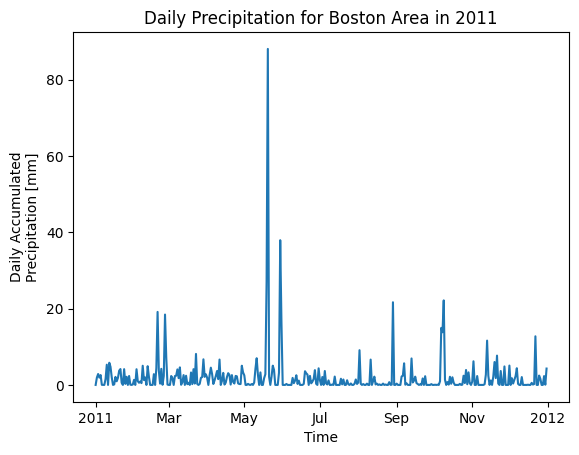

In [12]:
# Let's draw a line graph
boston_precip.plot.line()
plt.title("Daily Precipitation for Boston Area in 2011")
plt.show()

### **5.6 Data Aggregation**
In this section, let's do some data aggregation. First, we'll use the 2011 dataset. It's a daily precipitation dataset. Let's aggregate to a monthly precipitation dataset and visualize it. The following Python code demonstrates how this is done.

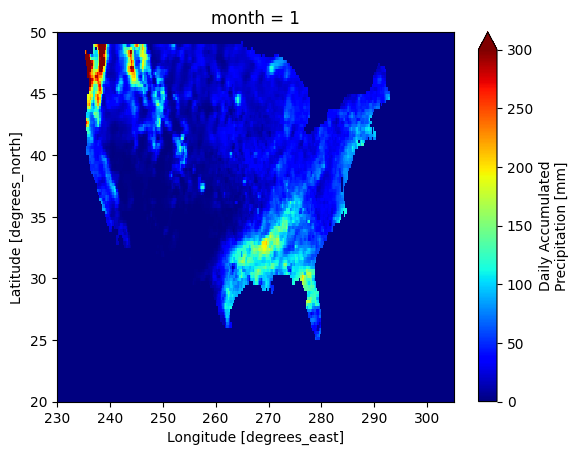

In [13]:
# Aggregate 2011 dataset from daily to monthly and visualize it.
ds2011_precip_mon = ds2011.groupby('time.month').sum()
ds2011_precip_mon.precip[0].plot(cmap='jet', vmax=300)

In the above data aggregation example, we rolled up daily precipitation data into monthly precipitation data and showed the amount of precipitation in January 2011 on a map. The next aggregation we would like to demonstrate is combining several files into one. At the start of this lesson, we downloaded data from 2011–2014 from NOAA PSL. The following code shows how to combine them together.

In [14]:
# Combine several datasets
ds2011_2014 = xr.open_mfdataset('precip.V1.0.*.nc', concat_dim='time', combine='nested')
ds2011_2014

<xarray.Dataset> Size: 210MB
Dimensions:  (time: 1461, lat: 120, lon: 300)
Coordinates:
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 12kB 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time, lat, lon) float32 210MB dask.array<chunksize=(1, 120, 300), meta=np.ndarray>
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

From the above metadata, we can see the data variable is precipitation (precip) and the coordinates are latitude, longitude, and time. The time dimension is daily frequency. The following chart from Python can give us an idea of what the metadata structure looks like.

In [15]:
ds2011_2014.precip.data

dask.array<concatenate, shape=(1461, 120, 300), dtype=float32, chunksize=(1, 120, 300), chunktype=numpy.ndarray>

From the above 3D chart, one rectangular shape consists of 36,000 (300 X 120) precipitation data points for a day. There are 1,461 days from 2011 to 2014. On the time dimension, we can roll up by month or year. The following example shows how to roll up the daily data into annual data.

In [16]:
data_temp = ds2011_2014.groupby("time.year").sum()
data_temp.precip.data

dask.array<concatenate, shape=(4, 120, 300), dtype=float32, chunksize=(1, 120, 300), chunktype=numpy.ndarray>

With a better understanding of the data structure, we can easily manipulate the dataset to get the different time aggregations we would like to have. In the next section, we'll show you how to turn this dataset into a pandas dataframe for future analysis work.

#**5.7 Convert NetCDF data to dataframe and save as a .csv file.**
In this section, we are going to show you how to convert a NetCDF data into a data frame. Here is the code.

In [17]:
# Convert NetCDF to dataframe
ds2011_2014_df = ds2011_2014.to_dataframe()
ds2011_2014_df = ds2011_2014_df.dropna()
ds2011_2014_df.head()

precip
time       lat    lon            
2011-01-01 25.125 278.875     0.0
                  279.125     0.0
                  279.375     0.0
                  279.625     0.0
           25.375 278.875     0.0

In [18]:
type(ds2011_2014_df)

pandas.core.frame.DataFrame

From the above code, we learned **how to convert the NetCDF4 dataset to a pandas dataframe**. This will help us in future analysis.

## **6. Conclusion**
In this lesson, we first introduced what climate data is and then described its attributes. In the second half of the lesson, we demonstrated how to pull climate data from a government agency and process climate data for future analysis. This lesson only covered the most basic concepts and methods for exploring climate data. For those who are interested in this topic, there is more information online.

## **References**
- Ahmadalipour, Ali. "Tutorial_Python_Geospatial." April 2022. https://colab.research.google.com/drive/1B7gFBSr0eoZ5IbsA0lY8q3XL8n-3BOn4.
- EPRI. “Climate 101: Physical Climate Data, An Introduction to Climate Data and Implications to Electricity Sector.” Physical Climate Data 101. 2023.
- Intergovernmental Panel on Climate Change. "Chapter 15: Investment and Finance." *IPCC Sixth Assessment Report*. https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-15/
- Xie, Pingping, et al. "A Gauge-Based Analysis of Daily Precipitation over East Asia." *Journal of Hydrometeorology*, vol. 8, no. 3, 2007, p. 607–626.